In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings

#Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#importing cancer dataset using Pandas
dataset = pd.read_csv('breast-cancer-wisconsin-data.csv')
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
dataset.shape

(569, 33)

In [6]:
dataset.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#Count duplicate rows
sum(dataset.duplicated())

0

In [9]:
#Deleting useless columns
#Deleting the "id" column
dataset.drop("id",axis=1,inplace=True)
#Deleting the "Unnamed" column
dataset.drop("Unnamed: 32",axis=1,inplace=True)

In [10]:
dataset.shape

(569, 31)

## Exploratory Data Analysis (EDA)

In [11]:
X = dataset.iloc[:,1:32]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y = dataset.iloc[:,0]
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

Número de Benignos:  357
Número de Malignos:  212


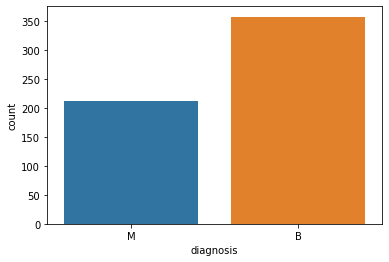

In [13]:
sns.countplot(dataset.diagnosis,label="Count")
B, M = dataset.diagnosis.value_counts()
print('Número de Benignos: ',B)
print('Número de Malignos: ',M)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1733AEF48>,
      dtype=object)

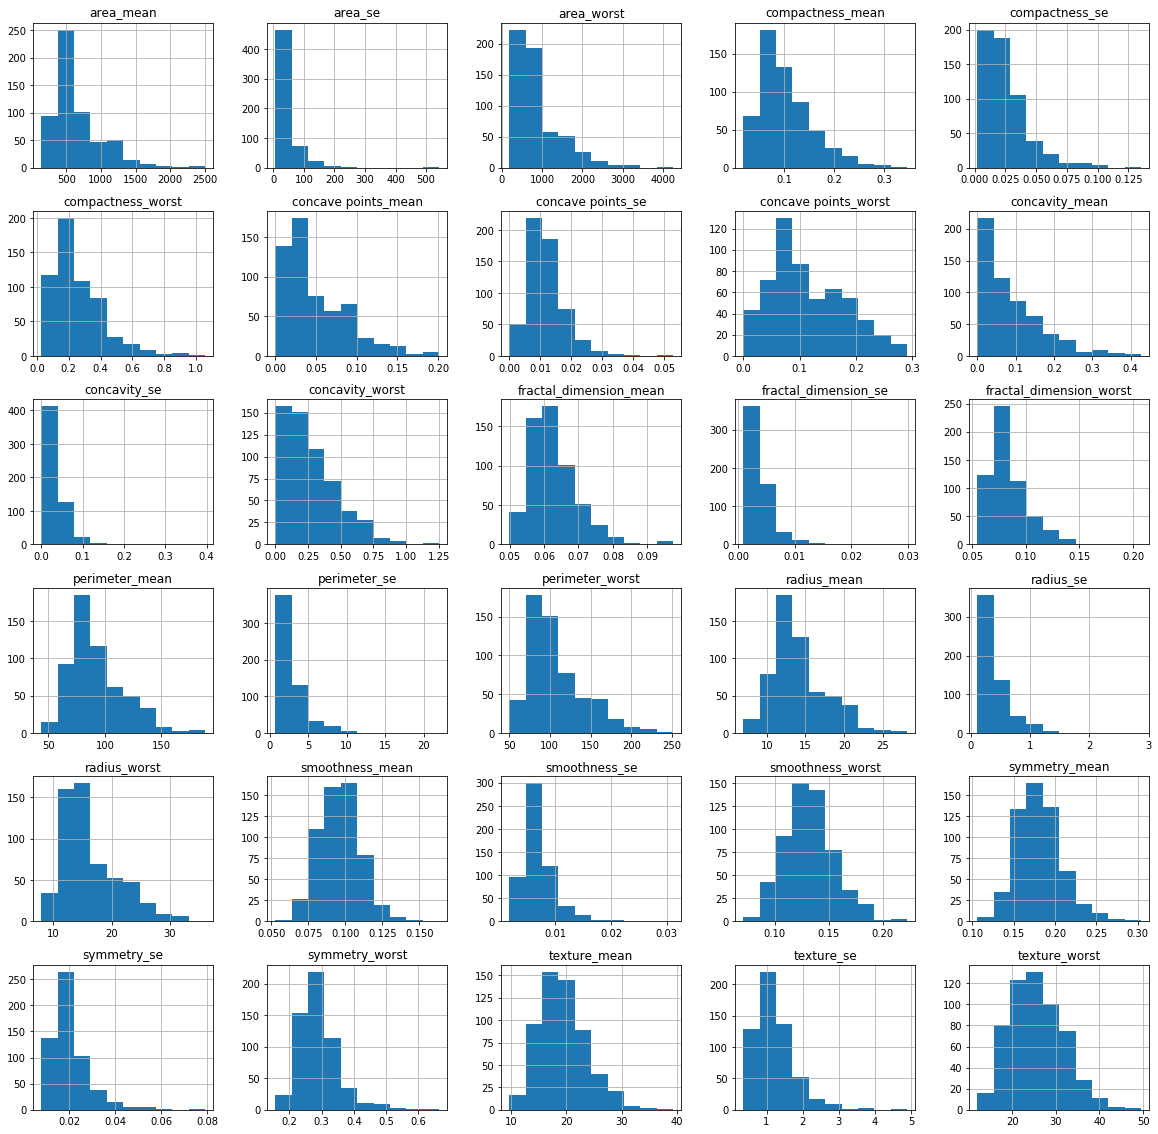

In [14]:
dataset.hist(bins=10, figsize=(20,20), grid="false")

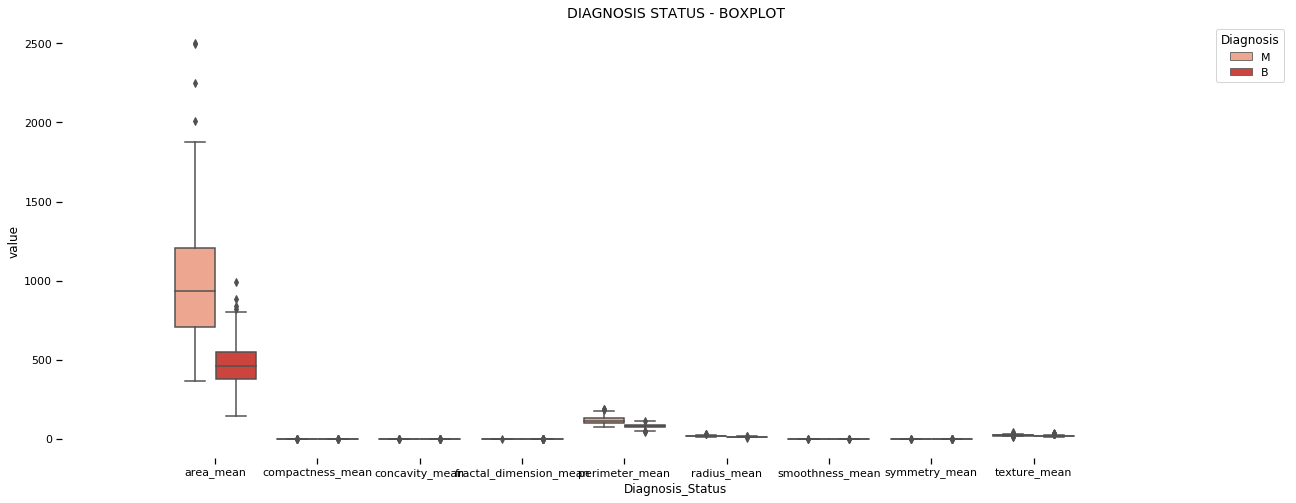

In [15]:
DiagnosisValue = dataset[['area_mean', 'compactness_mean', 'concavity_mean', 'fractal_dimension_mean', 'perimeter_mean', 'radius_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean']]

DiagnosisValue = pd.concat([dataset.diagnosis,DiagnosisValue],axis=1)
DiagnosisValue = pd.melt(DiagnosisValue,id_vars="diagnosis",
                    var_name="Diagnosis_Status",
                    value_name='value')

plt.figure(figsize=(22,8))
sns.set_context('notebook', font_scale=1)
sns.boxplot(y="value", x="Diagnosis_Status", hue="diagnosis", data=DiagnosisValue, palette='Reds', orient='v')
plt.legend(loc='best', title= 'Diagnosis', facecolor='white')
plt.xlim([-1.5,10.5])
plt.title('DIAGNOSIS STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

In [16]:
dataset.perimeter_mean.describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

Text(0.5, 1.0, 'Media Perimetral')

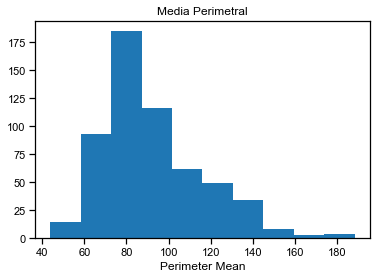

In [17]:
plt.hist(dataset['perimeter_mean'],bins=10,histtype='stepfilled')
plt.style.use('seaborn-dark')
plt.xlabel('Perimeter Mean')
plt.title('Media Perimetral')

In [18]:
dataset.radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

Text(0.5, 1.0, 'Media del Radio')

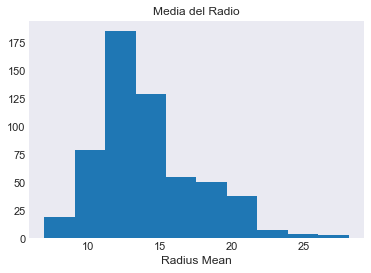

In [19]:
plt.hist(dataset['radius_mean'],bins=10,histtype='stepfilled')
plt.style.use('seaborn-dark')
plt.xlabel('Radius Mean')
plt.title('Media del Radio')

In [20]:
dataset.area_mean.describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

Text(0.5, 1.0, 'Media del Área')

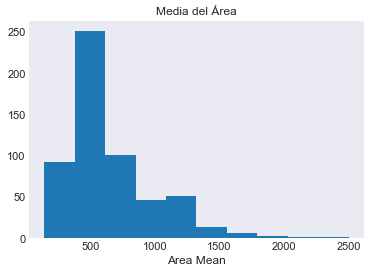

In [21]:
plt.hist(dataset['area_mean'],bins=10,histtype='stepfilled')
plt.style.use('seaborn-dark')
plt.xlabel('Area Mean')
plt.title('Media del Área')

Text(0.5, 1.0, 'Perímetro vs Área')

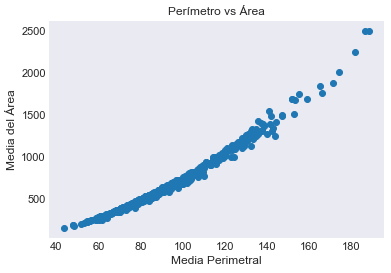

In [22]:
plt.scatter(dataset['perimeter_mean'],dataset['area_mean'])
plt.xlabel('Media Perimetral')
plt.ylabel('Media del Área')
plt.title('Perímetro vs Área')

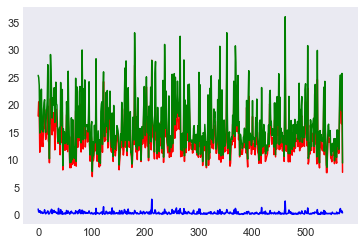

In [23]:
plt.plot(dataset['radius_mean'],color='red')
plt.plot(dataset['radius_se'],color='blue')
plt.plot(dataset['radius_worst'],color='green')

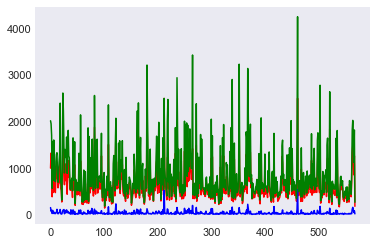

In [24]:
plt.plot(dataset['area_mean'],color='red')
plt.plot(dataset['area_se'],color='blue')
plt.plot(dataset['area_worst'],color='green')

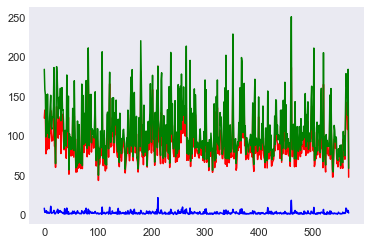

In [25]:
plt.plot(dataset['perimeter_mean'],color='red')
plt.plot(dataset['perimeter_se'],color='blue')
plt.plot(dataset['perimeter_worst'],color='green')

Text(0.5, 1.0, 'Gráfico de Dispersión del Radio')

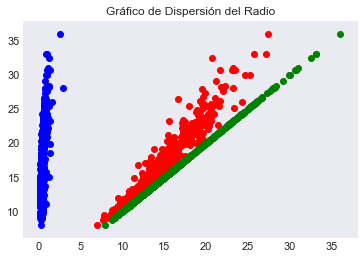

In [26]:
plt.scatter(dataset['radius_mean'],dataset['radius_worst'],color='red')
plt.scatter(dataset['radius_se'],dataset['radius_worst'],color='blue')
plt.scatter(dataset['radius_worst'],dataset['radius_worst'],color='green')
plt.title('Gráfico de Dispersión del Radio')

Text(0.5, 1.0, 'Gráfico de Dispersión del Área')

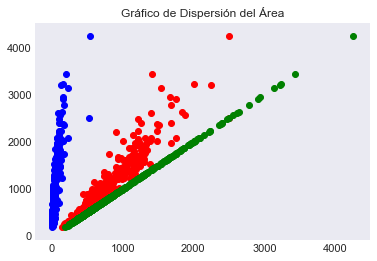

In [27]:
plt.scatter(dataset['area_mean'],dataset['area_worst'],color='red')
plt.scatter(dataset['area_se'],dataset['area_worst'],color='blue')
plt.scatter(dataset['area_worst'],dataset['area_worst'],color='green')
plt.title('Gráfico de Dispersión del Área')

Text(0.5, 1.0, 'Gráfico de Dispersión del Perímetro')

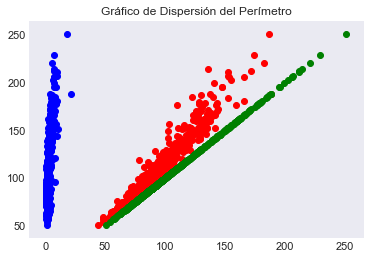

In [28]:
plt.scatter(dataset['perimeter_mean'],dataset['perimeter_worst'],color='red')
plt.scatter(dataset['perimeter_se'],dataset['perimeter_worst'],color='blue')
plt.scatter(dataset['perimeter_worst'],dataset['perimeter_worst'],color='green')
plt.title('Gráfico de Dispersión del Perímetro')

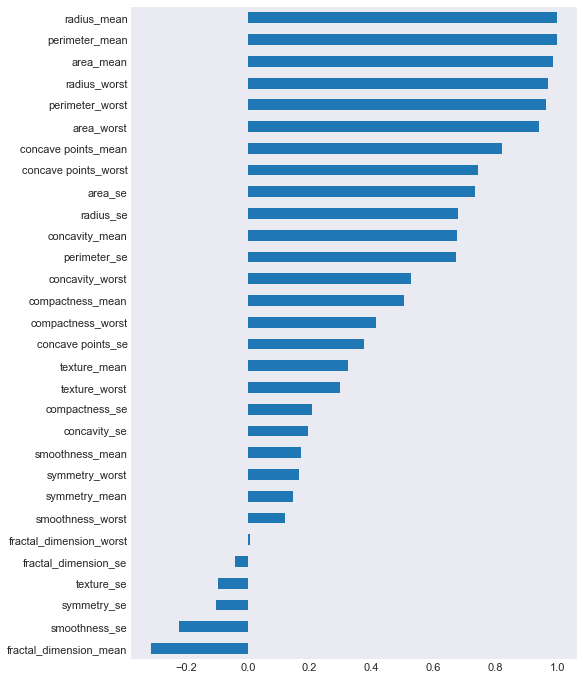

In [29]:

plt.figure(figsize=(8, 12))
X.corr()['radius_mean'].sort_values().plot(kind='barh')

C:\Users\josedct\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


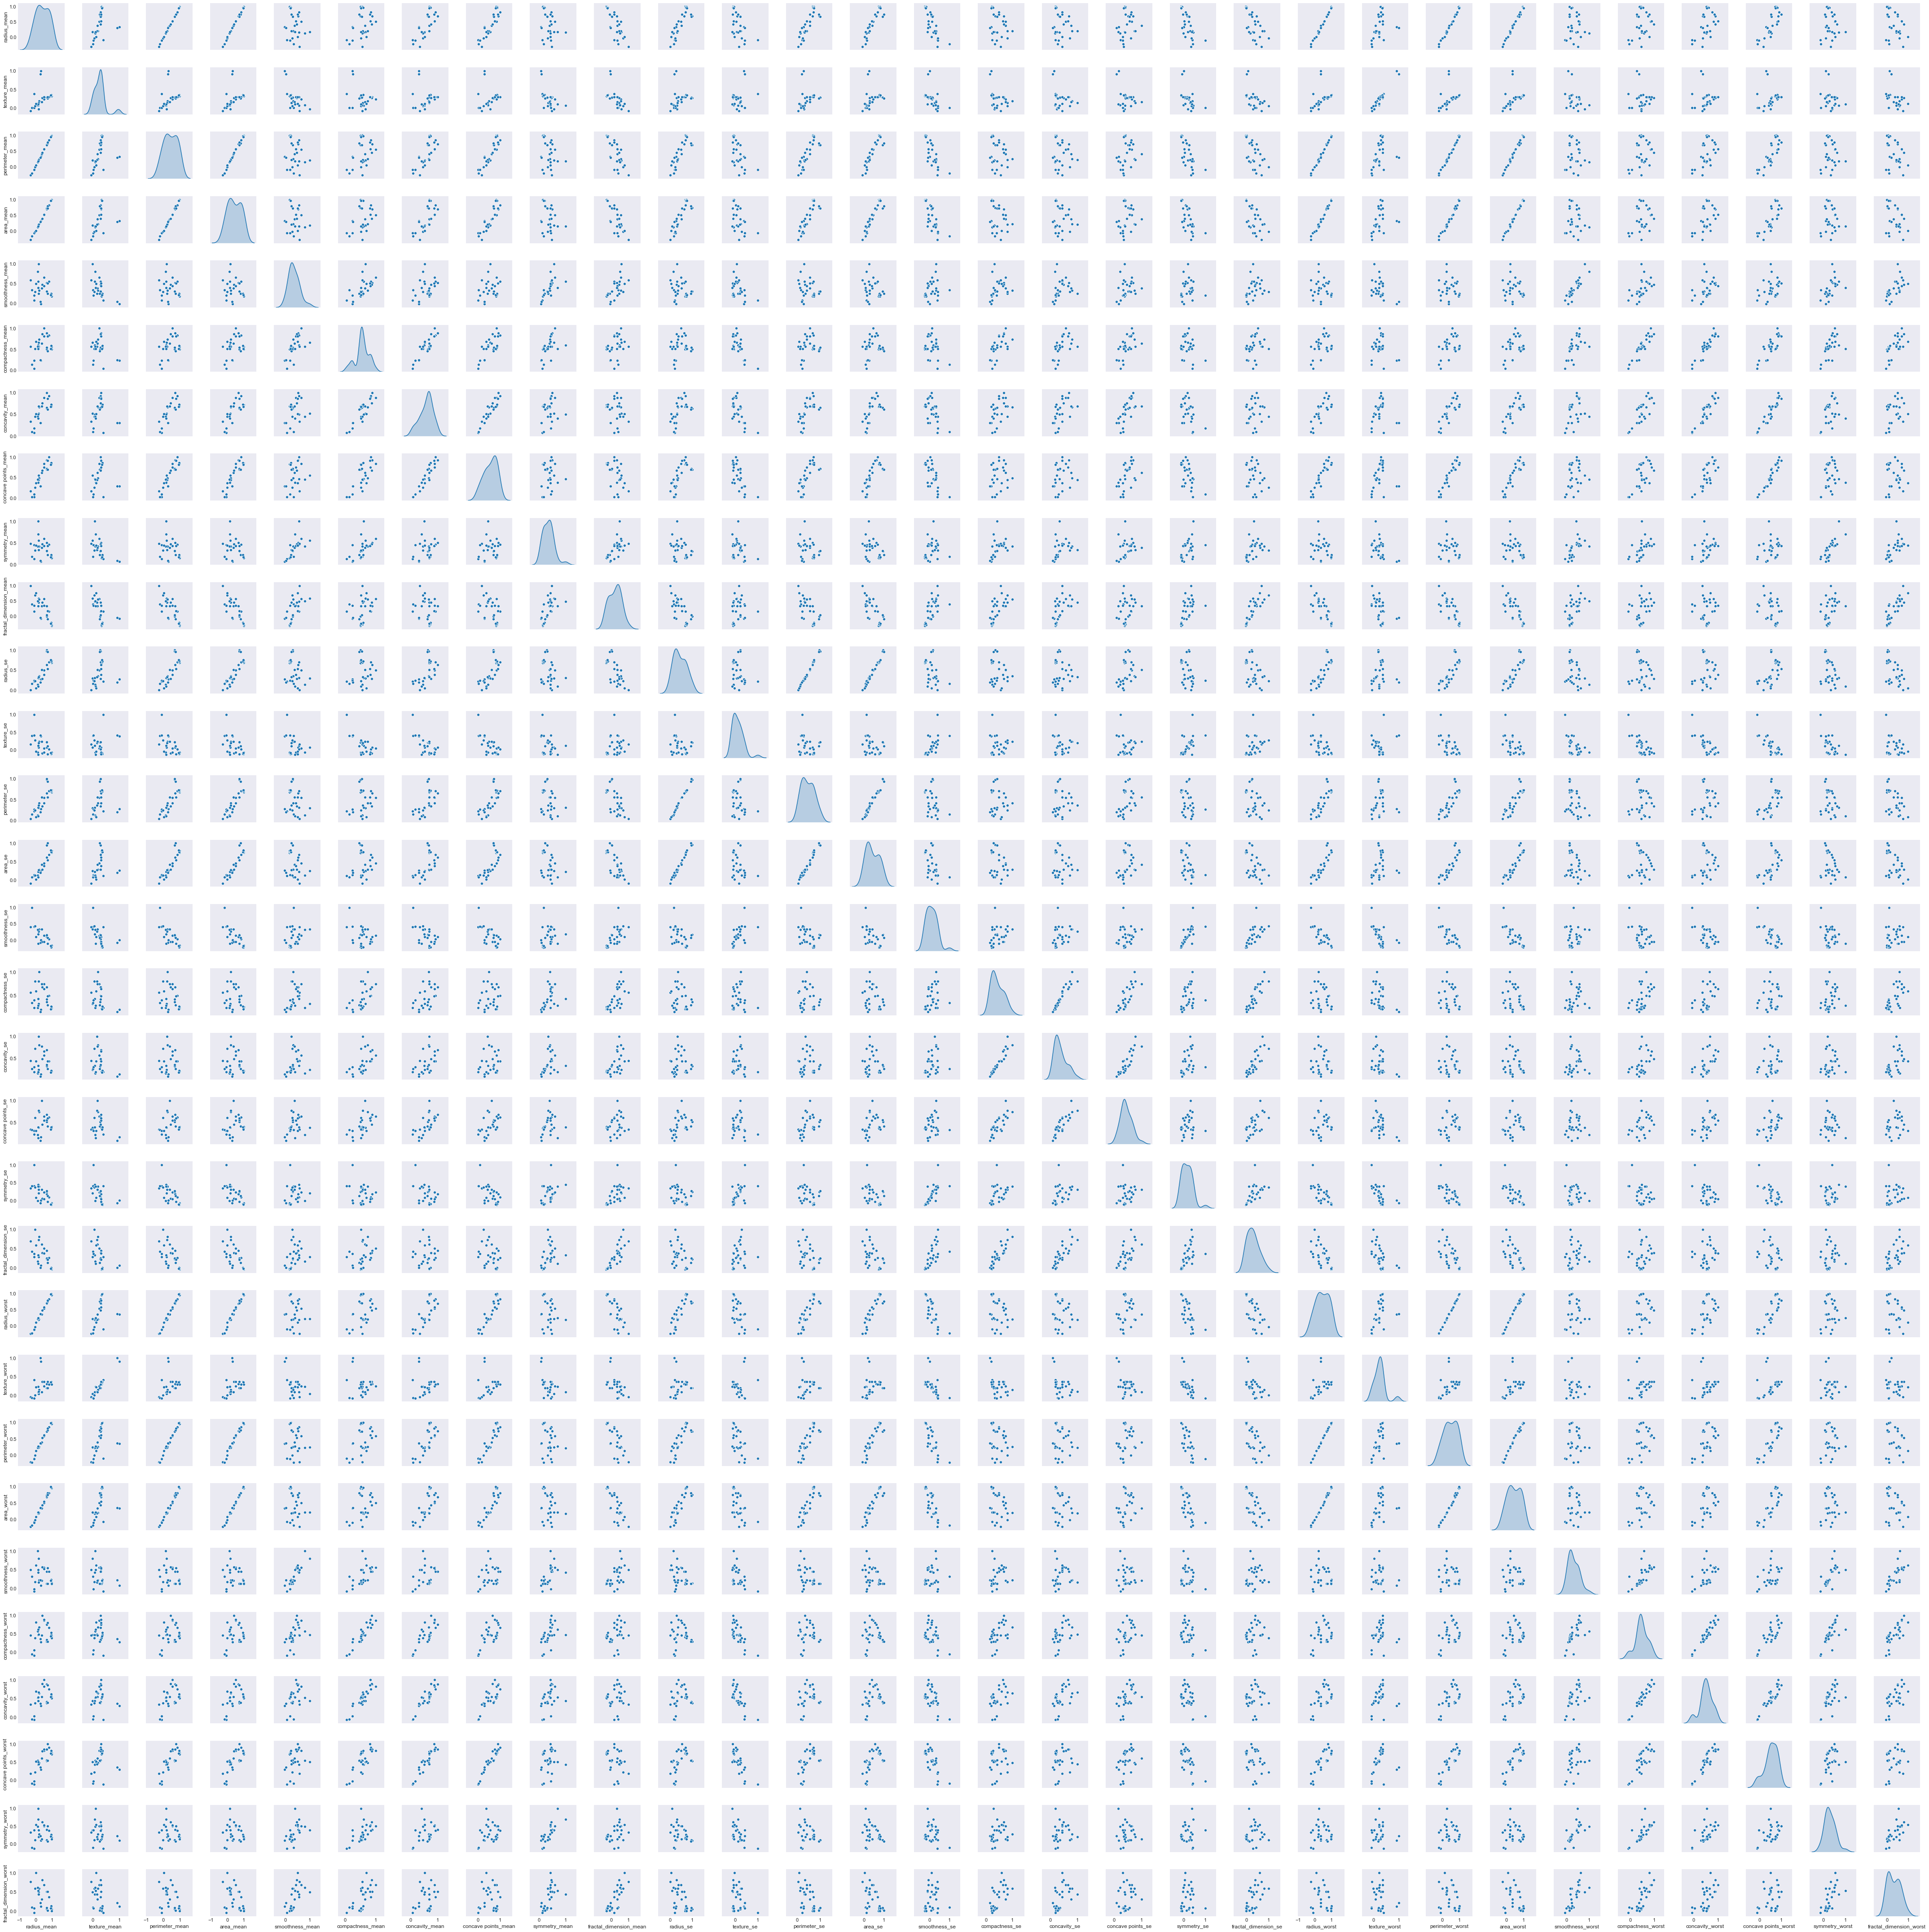

In [30]:
#Correlation Data
correlationData = X.corr()
sns.pairplot(X.corr(), diag_kind='kde', size=2);

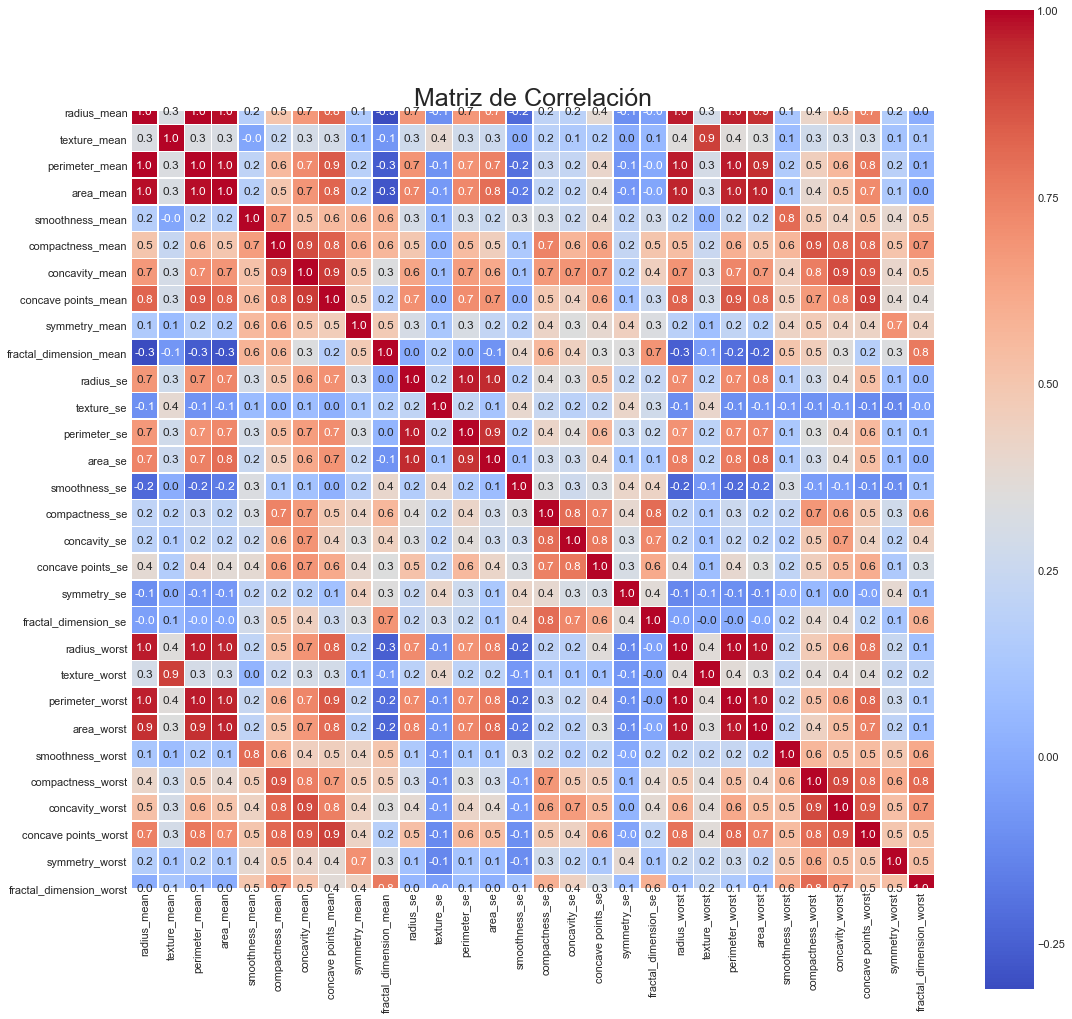

In [31]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot = True, fmt= '.1f'
            , xticklabels= True, yticklabels= True
            , cbar = True,  square = True
            , cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('Matriz de Correlación', size=25);

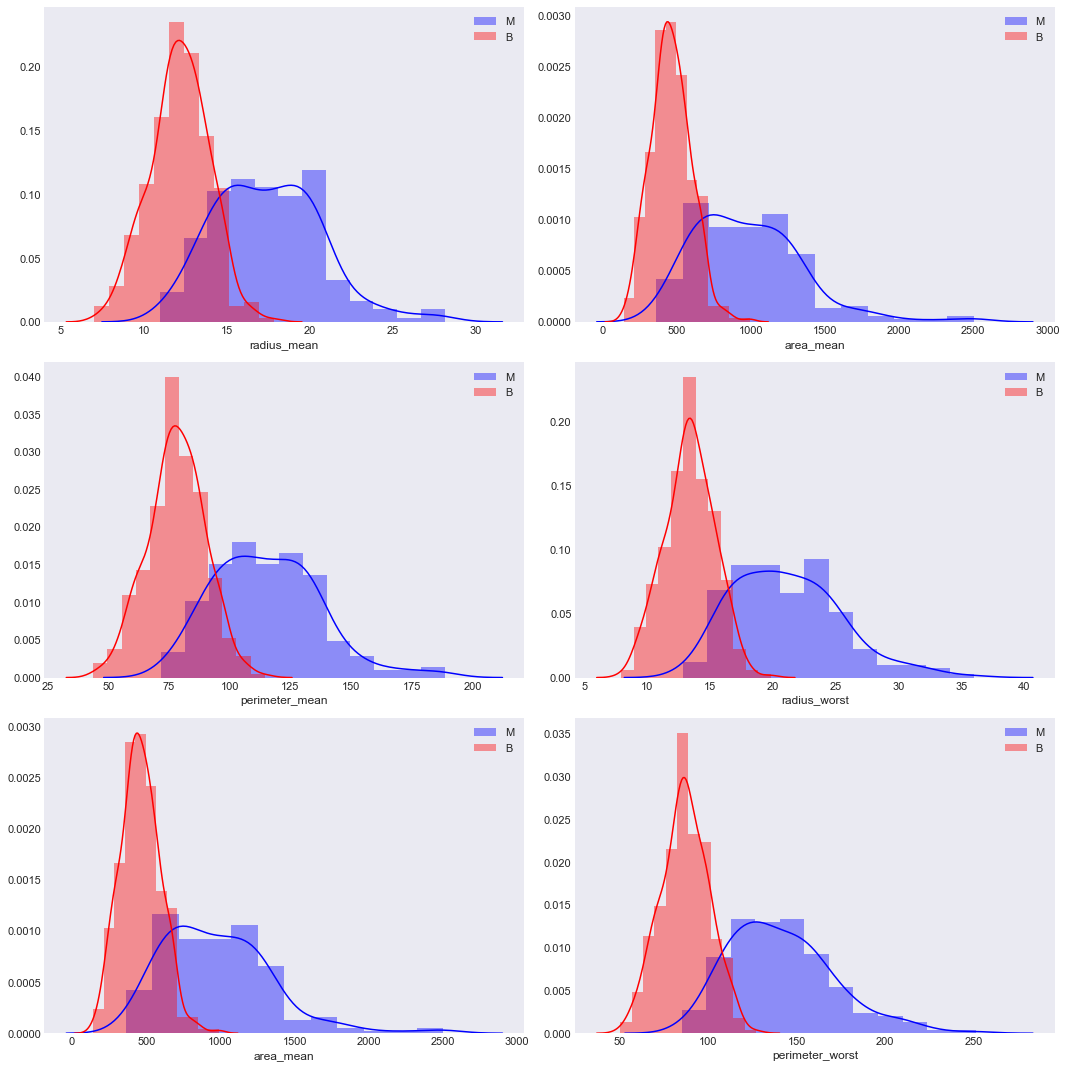

In [32]:
bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.distplot(dataset[dataset['diagnosis']=='M']['radius_mean'], bins=bins, color='blue', label='M')
sns.distplot(dataset[dataset['diagnosis']=='B']['radius_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.distplot(dataset[dataset['diagnosis']=='M']['area_mean'], bins=bins, color='blue', label='M')
sns.distplot(dataset[dataset['diagnosis']=='B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.distplot(dataset[dataset['diagnosis']=='M']['perimeter_mean'], bins=bins, color='blue', label='M')
sns.distplot(dataset[dataset['diagnosis']=='B']['perimeter_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
sns.distplot(dataset[dataset['diagnosis']=='M']['radius_worst'], bins=bins, color='blue', label='M')
sns.distplot(dataset[dataset['diagnosis']=='B']['radius_worst'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
sns.distplot(dataset[dataset['diagnosis']=='M']['area_mean'], bins=bins, color='blue', label='M')
sns.distplot(dataset[dataset['diagnosis']=='B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
sns.distplot(dataset[dataset['diagnosis']=='M']['perimeter_worst'], bins=bins, color='blue', label='M')
sns.distplot(dataset[dataset['diagnosis']=='B']['perimeter_worst'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [33]:
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(dataset.diagnosis)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [34]:
#Dividir el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
sum(X_train)

array([ 2.04281037e-14,  4.36983782e-13,  4.05120382e-13,  1.38666856e-13,
       -2.01116901e-13, -5.30131494e-15, -1.13686838e-13,  4.78228568e-14,
       -2.79110068e-13, -6.34159392e-13,  3.24185123e-14,  7.77156117e-14,
        1.54709578e-13,  1.47104551e-14,  1.38500322e-13,  9.04831765e-15,
        1.90958360e-14, -1.23873134e-13, -6.35047570e-14, -6.20614671e-14,
       -2.06612505e-13,  2.24043006e-13,  3.02424752e-13,  5.19584376e-14,
       -8.47655279e-14, -1.80335347e-14,  1.31838984e-13,  3.18634008e-14,
        2.40696352e-13, -1.46355150e-13])

In [37]:
warnings.filterwarnings('ignore')

In [38]:
def predict(classifier):
    classifier.fit(X_train,Y_train)
    y_pred=classifier.predict(X_test)
    return y_pred

In [39]:
def model_score(Result):
    score = metrics.accuracy_score(Y_test, Result)
    return score

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix Logistic Regression
[[65  2]
 [ 2 45]]


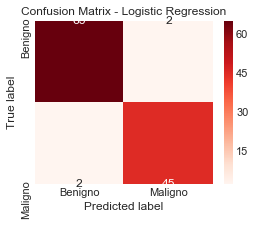

In [40]:
model_LR = LogisticRegression(random_state = 0)
Result_1=predict(model_LR)
Accuracy_LR = (model_score(Result_1))*100

print(classification_report(Y_test,Result_1))
print("Confusion Matrix Logistic Regression")
print(confusion_matrix(Y_test,Result_1))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Benigno', 'Maligno'], 
            yticklabels = ['Benigno', 'Maligno'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");




              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix KNeighbors Classifier
[[67  0]
 [ 5 42]]


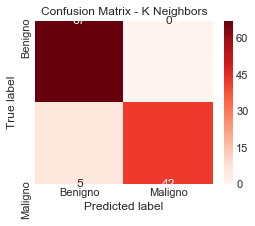

In [41]:
model_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Result_2=predict(model_KN)
Accuracy_KN = (model_score(Result_2))*100

print(classification_report(Y_test,Result_2))
print("Confusion Matrix KNeighbors Classifier")
print(confusion_matrix(Y_test,Result_2))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_KN.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Benigno', 'Maligno'], 
            yticklabels = ['Benigno', 'Maligno'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - K Neighbors");



              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix SVC Linear
[[66  1]
 [ 1 46]]


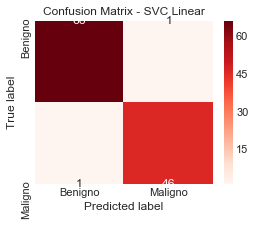

In [42]:
model_SVC_LInear = SVC(kernel = 'linear', random_state = 0)
Result_3=predict(model_SVC_LInear)
Accuracy_SVC_Linear = (model_score(Result_3))*100

print(classification_report(Y_test,Result_3))
print("Confusion Matrix SVC Linear")
print(confusion_matrix(Y_test,Result_3))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_SVC_LInear.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Benigno', 'Maligno'], 
            yticklabels = ['Benigno', 'Maligno'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVC Linear");

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix SVC RBF
[[67  0]
 [ 2 45]]


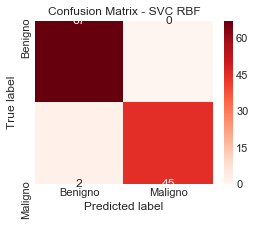

In [43]:
model_SVC_RBF = SVC(kernel = 'rbf', random_state = 0)
Result_4=predict(model_SVC_RBF)
Accuracy_SVC_RBF = (model_score(Result_4))*100

print(classification_report(Y_test,Result_4))
print("Confusion Matrix SVC RBF")
print(confusion_matrix(Y_test,Result_4))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_SVC_RBF.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Benigno', 'Maligno'], 
            yticklabels = ['Benigno', 'Maligno'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVC RBF");

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

Confusion Matrix GaussianNB
[[61  6]
 [ 5 42]]


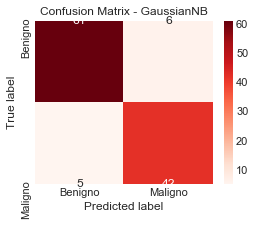

In [44]:
model_Gaussian=GaussianNB()
Result_5=predict(model_Gaussian)
Accuracy_Gaussian = (model_score(Result_5))*100

print(classification_report(Y_test,Result_5))
print("Confusion Matrix GaussianNB")
print(confusion_matrix(Y_test,Result_5))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_Gaussian.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Benigno', 'Maligno'], 
            yticklabels = ['Benigno', 'Maligno'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - GaussianNB");

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix Decision Tree
[[62  5]
 [ 3 44]]


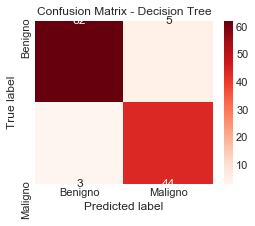

In [45]:
model_DecisionTree=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Result_6=predict(model_DecisionTree)
Accuracy_DT = (model_score(Result_6))*100

print(classification_report(Y_test,Result_6))
print("Confusion Matrix Decision Tree")
print(confusion_matrix(Y_test,Result_6))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_DecisionTree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Benigno', 'Maligno'], 
            yticklabels = ['Benigno', 'Maligno'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix Random Forest
[[66  1]
 [ 2 45]]


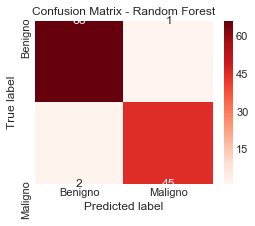

In [46]:
model_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Result_7=predict(model_RF)
Accuracy_RF = (model_score(Result_7))*100

print(classification_report(Y_test,Result_7))
print("Confusion Matrix Random Forest")
print(confusion_matrix(Y_test,Result_7))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_RF.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Benigno', 'Maligno'], 
            yticklabels = ['Benigno', 'Maligno'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");


In [47]:
models = pd.DataFrame({'Model Name':["Logistic Regression","KNN","SVC Linear","SVC RBF","Naive Bayes","Decision Tree","Random Forest"],\
                        'Accuracy':[Accuracy_LR,Accuracy_KN,Accuracy_SVC_Linear,Accuracy_SVC_RBF,Accuracy_Gaussian,Accuracy_DT,Accuracy_RF]})

In [48]:
#Test 20%
print(models)

            Model Name   Accuracy
0  Logistic Regression  96.491228
1                  KNN  95.614035
2           SVC Linear  98.245614
3              SVC RBF  98.245614
4          Naive Bayes  90.350877
5        Decision Tree  92.982456
6        Random Forest  97.368421
